# Project: House Price Prediction with Advanced Regression Techniques

###  Group Members: Damin, Jill, Manika, Rishitha

# **Index**
  

*   Loading Dataset & Preprocessing
*   Exploratory Data Analysis & Visualizations


*   Regression Algorithms & Comparison
*   Ensemble Methods & Prediction


*   Advanced Regression: Lasso & Ridge
*   Key Insights & Extensions








# Dataset Details:

**Link to the USA Real Estate Dataset:**
* https://www.kaggle.com/datasets/fatemedavar/usausausa

This dataset contains Real Estate listings in the US broken by twelve State and zip code

Dataset Overview : The dataset consists of 100,000 entries. It is represented as a pandas DataFrame with a range Index ranging from 0 to 99999.

### Column Information:

-> States : Object type. Represents the status of the property.

-> bed: Float64 type. Indicates the number of bedrooms in the property. 75,050 non-null entries.

-> bath: Float64 type. Denotes the number of bathrooms in the property. 75,112 non-null entries.

-> acre_lot: Float64 type. Provides information about the size of the lot in acres. 85,987 non-null entries.

-> city: Object type. Specifies the city where the property is located. 99,948 non-null entries.

->state: Object type. Represents the state in which the property is situated. All 100,000 entries have non-null values.

-> zip_code:Float64 type. Contains the zip code of the property location. 99,805 non-null entries.

-> house_size: Float64 type. Indicates the size of the house. 75,082 non-null entries.

-> prev_sold_date: Object type. Represents the date when the property was previously sold. 28,745 non-null entries.

-> price: Int64 type. Specifies the price of the property. All 100,000 entries have non-null values.

-> Data Types and Memory Usage : The dataset comprises float64, int64, and object data types. The total memory usage is approximately 7.6 MB.

# 1. Importing Necessary Libraries:

In [241]:

# Required Libraries.
import time
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

# 2. Loading the DataSet:



In [242]:
# Read the dataset
df_usapp = pd.read_csv('/content/usausa.csv')
df_usapp

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN,80000
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN,67000
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaN,145000
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,NaN,65000
...,...,...,...,...,...,...,...,...,...,...
99995,for_sale,3.0,3.0,NaN,Hudson,Massachusetts,1749.0,2864.0,NaN,749900
99996,for_sale,2.0,1.0,0.34,Auburn,Massachusetts,1501.0,1075.0,6/7/99,349900
99997,for_sale,3.0,2.0,1.01,Shrewsbury,Massachusetts,1545.0,1632.0,9/27/95,549000
99998,for_sale,3.0,2.0,0.12,Worcester,Massachusetts,1604.0,1332.0,9/11/00,299000


# 3. Data Cleaning & Preprocessing:

In [243]:
df_usapp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   status          100000 non-null  object 
 1   bed             75050 non-null   float64
 2   bath            75112 non-null   float64
 3   acre_lot        85987 non-null   float64
 4   city            99948 non-null   object 
 5   state           100000 non-null  object 
 6   zip_code        99805 non-null   float64
 7   house_size      75082 non-null   float64
 8   prev_sold_date  28745 non-null   object 
 9   price           100000 non-null  int64  
dtypes: float64(5), int64(1), object(4)
memory usage: 7.6+ MB


In [244]:
# List of all states.
unique_value = df_usapp['state'].unique()
print('List of states in USA Dataset\n')
print('List of states:', unique_value)

# Counting of states.
sum_state = len(unique_value)
print('\nTotal number of states:', sum_state)

List of states in USA Dataset

List of states: ['Puerto Rico' 'Virgin Islands' 'Massachusetts' 'Connecticut'
 'New Hampshire' 'Vermont' 'New Jersey' 'New York' 'South Carolina'
 'Tennessee' 'Rhode Island' 'Virginia']

Total number of states: 12


In [245]:
# Removing columns that do not need further analysis.
df_usapp_new = df_usapp.drop(['status', 'zip_code', 'prev_sold_date'], axis=1)
df_usapp_new

,bed,bath,acre_lot,city,state,house_size,price
0,3.0,2.0,0.12,Adjuntas,Puerto Rico,920.0,105000
1,4.0,2.0,0.08,Adjuntas,Puerto Rico,1527.0,80000
2,2.0,1.0,0.15,Juana Diaz,Puerto Rico,748.0,67000
3,4.0,2.0,0.10,Ponce,Puerto Rico,1800.0,145000
4,6.0,2.0,0.05,Mayaguez,Puerto Rico,NaN,65000
...,...,...,...,...,...,...,...
99995,3.0,3.0,NaN,Hudson,Massachusetts,2864.0,749900
99996,2.0,1.0,0.34,Auburn,Massachusetts,1075.0,349900
99997,3.0,2.0,1.01,Shrewsbury,Massachusetts,1632.0,549000
99998,3.0,2.0,0.12,Worcester,Massachusetts,1332.0,299000


In [246]:
# Rename a column 'acre_lot' into a column 'land_size(acres)'
df_usapp_new.rename(columns = {'acre_lot':'land_size(acres)'}, inplace=True)
df_usapp_new

,bed,bath,land_size(acres),city,state,house_size,price
0,3.0,2.0,0.12,Adjuntas,Puerto Rico,920.0,105000
1,4.0,2.0,0.08,Adjuntas,Puerto Rico,1527.0,80000
2,2.0,1.0,0.15,Juana Diaz,Puerto Rico,748.0,67000
3,4.0,2.0,0.10,Ponce,Puerto Rico,1800.0,145000
4,6.0,2.0,0.05,Mayaguez,Puerto Rico,NaN,65000
...,...,...,...,...,...,...,...
99995,3.0,3.0,NaN,Hudson,Massachusetts,2864.0,749900
99996,2.0,1.0,0.34,Auburn,Massachusetts,1075.0,349900
99997,3.0,2.0,1.01,Shrewsbury,Massachusetts,1632.0,549000
99998,3.0,2.0,0.12,Worcester,Massachusetts,1332.0,299000


In [247]:
# Checking duplicates in the dataset.
print('Number of duplicates :', df_usapp_new.duplicated().sum())

Number of duplicates : 85401


In [248]:
# Removing all duplicates in the dataset.
df_usapp_new.drop_duplicates(inplace=True)

# Checking duplicates after removed.
df_usapp_new.duplicated().sum()
print('Number of duplicates after removed:', df_usapp_new.duplicated().sum())
df_usapp_new.info()

Number of duplicates after removed: 0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 14599 entries, 0 to 97288
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   bed               11273 non-null  float64
 1   bath              11273 non-null  float64
 2   land_size(acres)  12766 non-null  float64
 3   city              14583 non-null  object 
 4   state             14599 non-null  object 
 5   house_size        11274 non-null  float64
 6   price             14599 non-null  int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 912.4+ KB


In [249]:
# Checking a missing data.
print('Columns and missing data:')
df_usapp_new.isnull().sum()

Columns and missing data:


bed                 3326
bath                3326
land_size(acres)    1833
city                  16
state                  0
house_size          3325
price                  0
dtype: int64

In [250]:
# Replace missing values.
df_usapp_new['bed'].fillna(df_usapp_new['bed'].median(), inplace=True)
df_usapp_new['bath'].fillna(df_usapp_new['bath'].median(), inplace=True)
df_usapp_new['house_size'].fillna(df_usapp_new['house_size'].median(), inplace=True)
df_usapp_new['land_size(acres)'].fillna(df_usapp_new['land_size(acres)'].median(), inplace=True)
df_usapp_new.dropna(subset=['city'], inplace=True)

# Checking missing values again.
df_usapp_new.isnull().sum()

bed                 0
bath                0
land_size(acres)    0
city                0
state               0
house_size          0
price               0
dtype: int64

In [251]:
# All columns in the dataset are of the same dimension.
df_usapp_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14583 entries, 0 to 97288
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   bed               14583 non-null  float64
 1   bath              14583 non-null  float64
 2   land_size(acres)  14583 non-null  float64
 3   city              14583 non-null  object 
 4   state             14583 non-null  object 
 5   house_size        14583 non-null  float64
 6   price             14583 non-null  int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 911.4+ KB


In [252]:
# First five houses with the smallest price.
# We can see that houses price with the same house size don't have the same price.
df_usapp_new.nsmallest(5, 'price')

,bed,bath,land_size(acres),city,state,house_size,price
33851,3.0,2.0,0.50,Hinsdale,New Hampshire,1759.5,445
29835,3.0,2.0,0.31,Hubbardston,Massachusetts,1759.5,7900
28305,3.0,2.0,0.28,Becket,Massachusetts,1759.5,9500
28229,3.0,2.0,0.67,Florida,Massachusetts,1759.5,9900
28225,3.0,2.0,0.46,Florida,Massachusetts,1759.5,10000


In [253]:
# First five houses with the highest price.
# We can see that houses with the highest price don't have the largest land size.
df_usapp_new.nlargest(5, 'price')

,bed,bath,land_size(acres),city,state,house_size,price
40599,9.0,10.0,400.00,Woodstock,Connecticut,18777.0,60000000
2791,3.0,2.0,100.00,Isabela,Puerto Rico,1759.5,25000000
11799,3.0,2.0,618.36,Christiansted,Virgin Islands,1759.5,24500000
11292,3.0,2.0,130.00,Saint Thomas,Virgin Islands,1759.5,23000000
11674,3.0,2.0,744.00,Christiansted,Virgin Islands,1759.5,22500000


In [254]:
# Grouping to 'state' and 'price'.
df_group = df_usapp_new.groupby(['state', 'price']).sum()
df_group

bed  bath  land_size(acres)  house_size
state          price                                            
Connecticut    14900     3.0   2.0              1.75      1759.5
               16000     3.0   2.0              0.33      1759.5
               19900     6.0   4.0              2.64      3519.0
               20000     3.0   2.0              1.00      1038.0
               24900     4.0   3.0              0.68      2215.5
...                      ...   ...               ...         ...
Virgin Islands 17500000  3.0   2.0           2377.00      1759.5
               22500000  3.0   2.0            744.00      1759.5
               23000000  3.0   2.0            130.00      1759.5
               24500000  3.0   2.0            618.36      1759.5
Virginia       75000     3.0   2.0              0.50      1759.5

[4330 rows x 4 columns]

#  **4. Exploratory Data Analysis & Visualizations:**

**House Prices in Top 10 States**

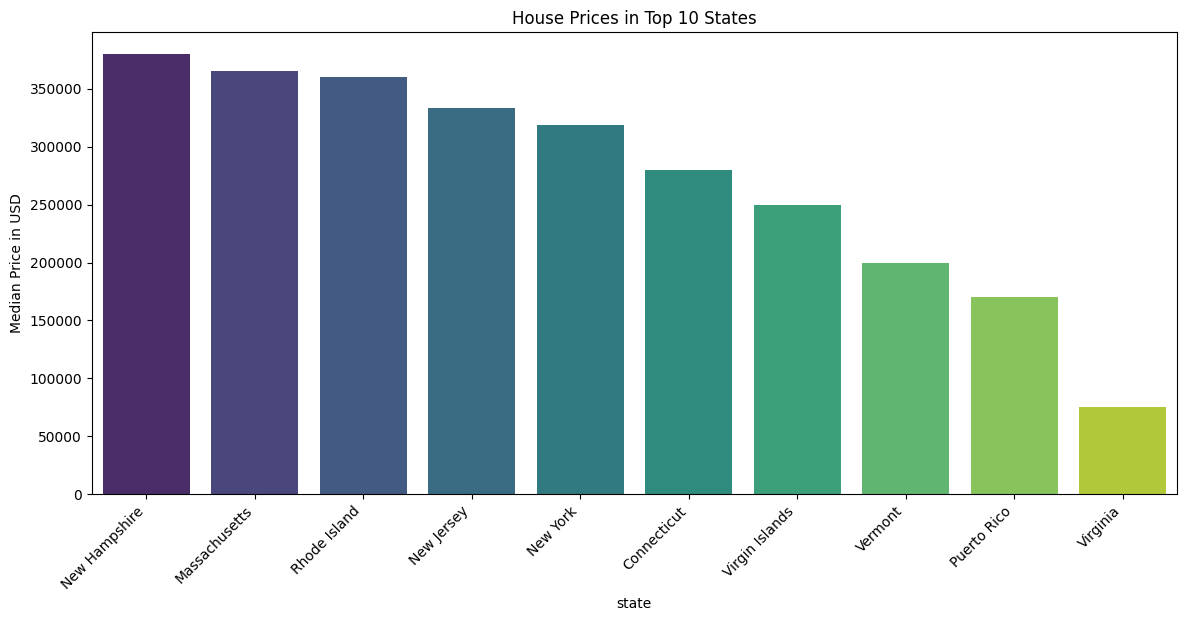

In [255]:
#Median prices for each state
median_prices = df_usapp_new.groupby('state')['price'].median().sort_values(ascending=False)

#Let's Pick the top 10 states
top_10_states = median_prices.head(10)

#Bar chart for the top 10 states
plt.figure(figsize=(14, 6))
sns.barplot(x=top_10_states.index, y=top_10_states.values, palette='viridis')
plt.title('House Prices in Top 10 States')
plt.xlabel('state')
plt.ylabel('Median Price in USD')
plt.xticks(rotation=45, ha='right')
plt.show()


First we find the median prices for each state, then selects the top 10 states based on median prices.

we can see 'New Hampshire' is the topmost state in accordance with the prices.

**Correlation HeatMap**

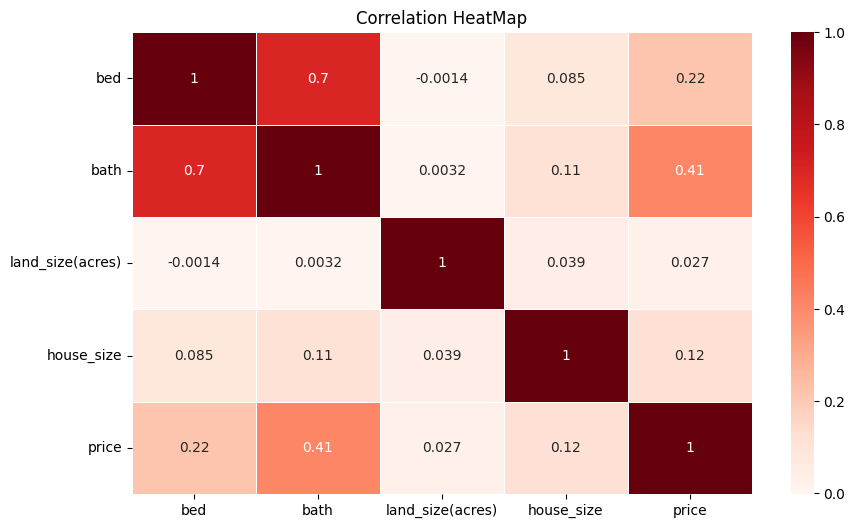

In [256]:
#Correlation
plt.figure(figsize=(10, 6))
sns.heatmap(df_usapp_new.corr(), annot=True, linewidth=.4, cmap='Reds')
plt.title('Correlation HeatMap')
plt.show()

1. In the above Visualization, We can see the correlation between all the columns.

2. Darker the colour in the map, stronger the correlation between the columns.

3. From the above Data Analysis, We can conclude the following things:-

'bed' and 'bath' have 0.7 correlation with eachother, that means they are highly correlated. So, the number of bathrooms in a house is correlated with number of bedrooms. Also, we can see that the correlation between bath and price is 0.4 that means, even the number of bathrooms will give the price fluctuations/predictions in the house.

**Pairwise Relationships with State as Hue**

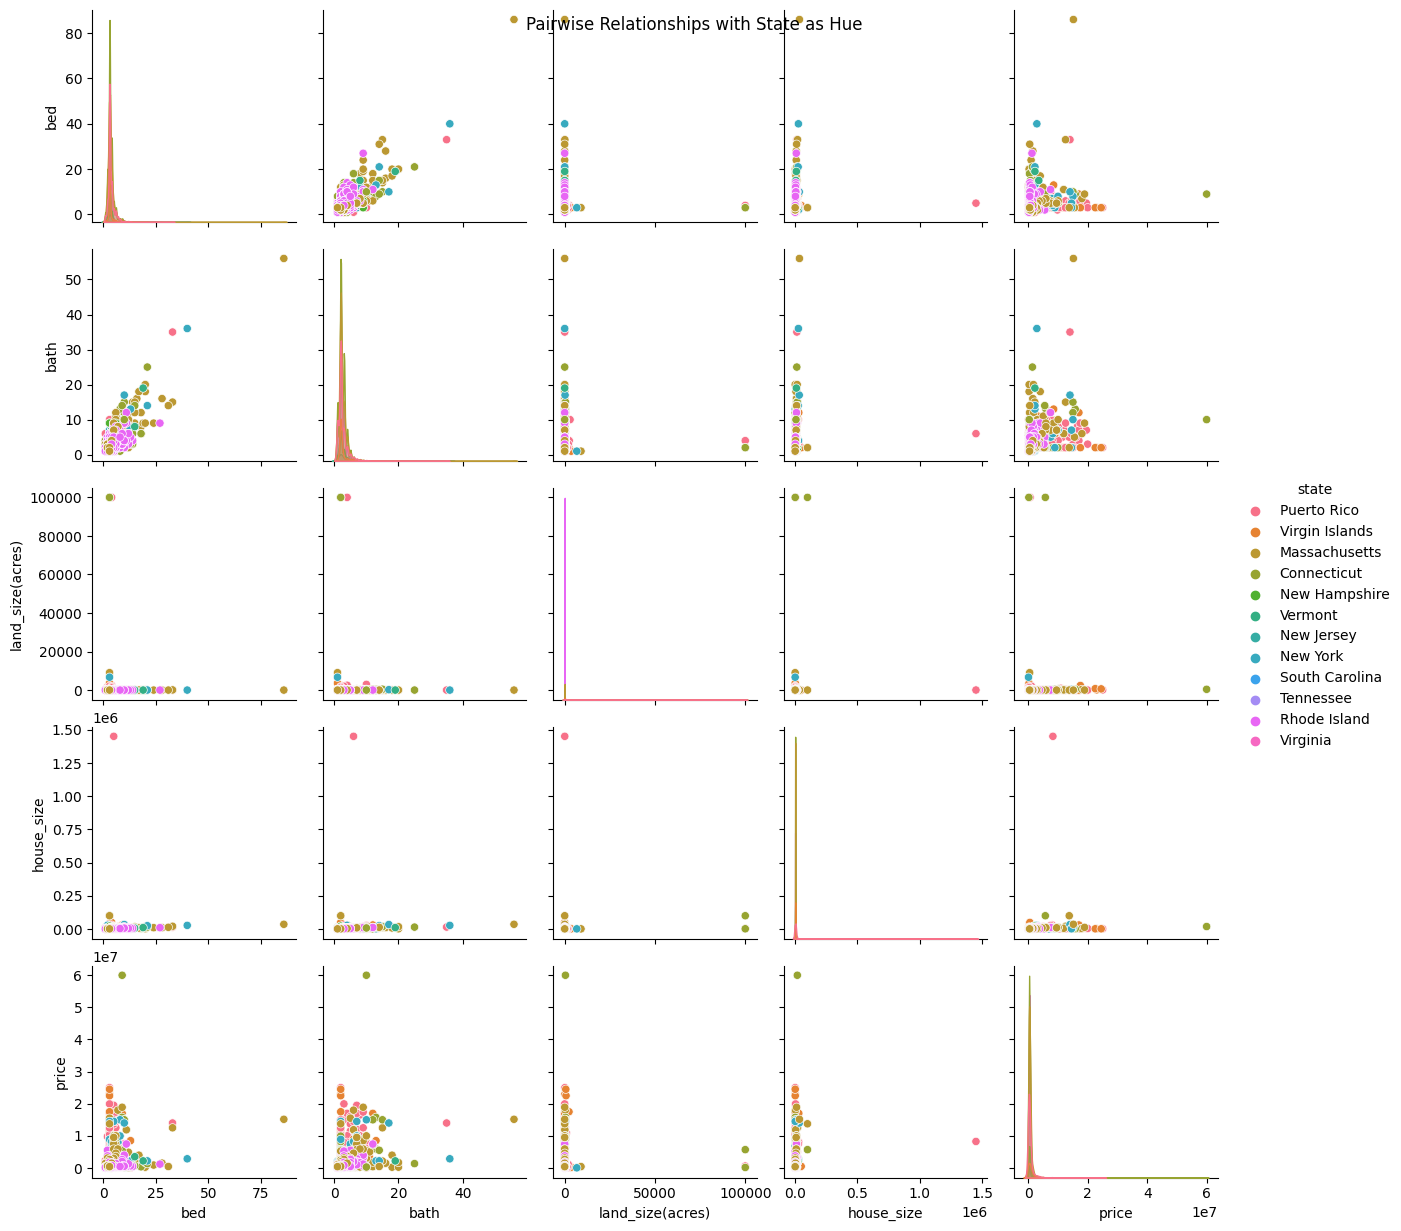

In [257]:
# Pair Plot with Hue for State
sns.pairplot(df_usapp_new, hue='state', palette='husl', markers='o')
plt.suptitle('Pairwise Relationships with State as Hue')
plt.show()

We can see the Pair plot with hue for the 'state' variable which helps to visually inspect how the pairwise relationships between other variables differ across different states.

**Relationship between State and price by combining them**

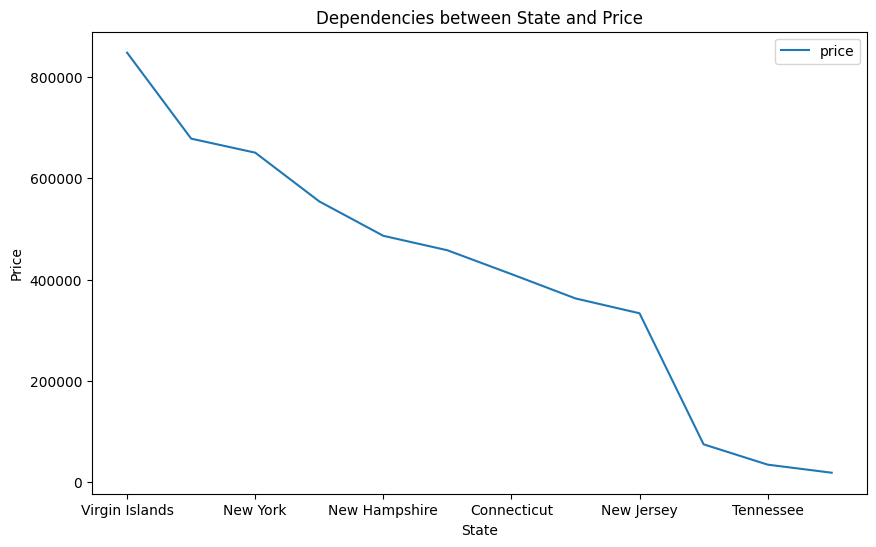

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Puerto Rico'),
  Text(1, 0, 'Virgin Islands'),
  Text(2, 0, 'Massachusetts'),
  Text(3, 0, 'Connecticut'),
  Text(4, 0, 'New Hampshire'),
  Text(5, 0, 'Vermont'),
  Text(6, 0, 'New Jersey'),
  Text(7, 0, 'New York'),
  Text(8, 0, 'South Carolina'),
  Text(9, 0, 'Tennessee'),
  Text(10, 0, 'Rhode Island'),
  Text(11, 0, 'Virginia')])

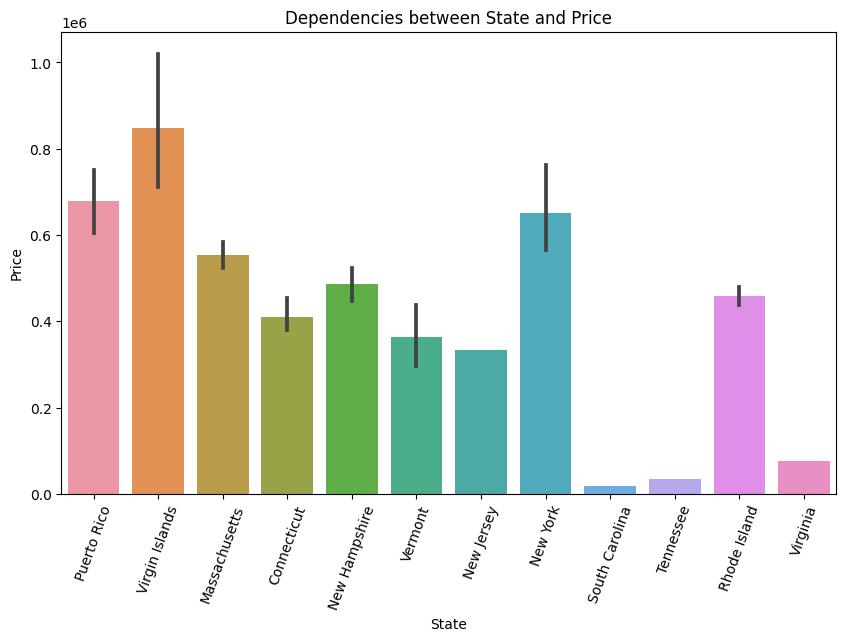

In [258]:
#relationship between State and price by combining them
plot = df_usapp_new.pivot_table(
    index=['state'], values='price').sort_values('price', ascending=False)
plot.plot(figsize=(10, 6))
plt.title('Dependencies between State and Price')
plt.xlabel('State')
plt.ylabel('Price')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=df_usapp_new, x='state', y='price')
plt.title('Dependencies between State and Price')
plt.xlabel('State')
plt.ylabel('Price')
plt.xticks(rotation=70)

The Line plot and Bar plot provides how average prices vary across different states.

We can observe here 'VIRGIN ISLANDS' have higher average house prices and 'SOUTH CAROLINA' have lower average house prices.

**Top 20 Highest average of Price by Cities**

[Text(-90, 0, '4765654.0 USD'),
 Text(-90, 0, '4162114.0 USD'),
 Text(-90, 0, '3835786.0 USD'),
 Text(-90, 0, '3247611.0 USD'),
 Text(-90, 0, '3007700.0 USD'),
 Text(-90, 0, '2728833.0 USD'),
 Text(-90, 0, '2313406.0 USD'),
 Text(-90, 0, '2224776.0 USD'),
 Text(-90, 0, '2157694.0 USD'),
 Text(-90, 0, '2148516.0 USD'),
 Text(-90, 0, '2111376.0 USD'),
 Text(-90, 0, '1993000.0 USD'),
 Text(-90, 0, '1937500.0 USD'),
 Text(-90, 0, '1887952.0 USD'),
 Text(-90, 0, '1885000.0 USD'),
 Text(-90, 0, '1850000.0 USD'),
 Text(-90, 0, '1784690.0 USD'),
 Text(-90, 0, '1775338.0 USD'),
 Text(-90, 0, '1767893.0 USD'),
 Text(-90, 0, '1707666.0 USD')]

<Figure size 2500x900 with 0 Axes>

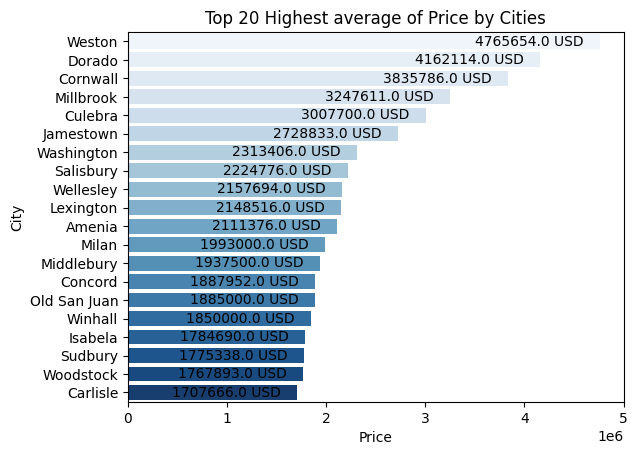

In [259]:
#Highest average of prices by cities.
city_avg_high_price = \
    df_usapp_new['price'].groupby(df_usapp_new['city']).mean().round(0).nlargest(20).sort_values(ascending=False).reset_index()

#Subplot
plt.figure(figsize=(25,9))
fig, ax = plt.subplots()
ax = sns.barplot(ax=ax, data=city_avg_high_price, y=city_avg_high_price.city, x=city_avg_high_price.price, palette='Blues')
ax.set(ylabel='City', xlabel='Price', title='Top 20 Highest average of Price by Cities')
ax.bar_label(ax.containers[0],
             padding = -90, color='Black', fontsize=10, label_type='edge', fmt='%.1f USD')

From the above visualization, we can conclude that 'Weston' is the Topmost city to have Highest Average Price.

**Top 20 Lowest average of Price by Cities**

[Text(-67, 0, '99999.0 USD'),
 Text(-67, 0, '95879.0 USD'),
 Text(-67, 0, '94443.0 USD'),
 Text(-67, 0, '94000.0 USD'),
 Text(-67, 0, '93600.0 USD'),
 Text(-67, 0, '92500.0 USD'),
 Text(-67, 0, '92450.0 USD'),
 Text(-67, 0, '89969.0 USD'),
 Text(-67, 0, '78297.0 USD'),
 Text(-67, 0, '75000.0 USD'),
 Text(-67, 0, '75000.0 USD'),
 Text(-67, 0, '71667.0 USD'),
 Text(-67, 0, '70000.0 USD'),
 Text(-67, 0, '65000.0 USD'),
 Text(-67, 0, '63500.0 USD'),
 Text(-67, 0, '57500.0 USD'),
 Text(-67, 0, '55000.0 USD'),
 Text(-67, 0, '34900.0 USD'),
 Text(-67, 0, '28000.0 USD'),
 Text(-67, 0, '18950.0 USD')]

<Figure size 2500x900 with 0 Axes>

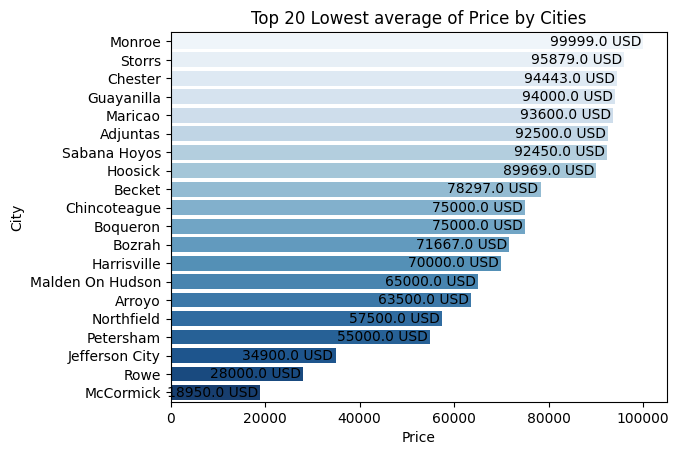

In [260]:
#The lowest average of prices by cities
city_low_price = \
    df_usapp_new['price'].groupby(df_usapp_new['city']).mean().round(0).nsmallest(20).sort_values(ascending = False).reset_index()

#subplot
plt.figure(figsize=(25,9))
fig, ax = plt.subplots()
ax = sns.barplot(ax=ax, data=city_low_price , y=city_low_price.city, x=city_low_price.price, palette= 'Blues')
ax.set(ylabel='City', xlabel='Price', title='Top 20 Lowest average of Price by Cities')
ax.bar_label(ax.containers[0],
             padding = -67, color='Black', fontsize=10, label_type='edge', fmt='%.1f USD')

From the above visualization, we can conclude that 'Monroe' is the Topmost city to have Lowest Average Price.

**Representing states of USA from this dataset**

In [261]:
# Representing states of USA from this dataset.
fig = px.choropleth(df_usapp_new,
                    locations=['PR', 'VI', 'MA', 'CT', 'NH', 'VT', 'NJ', 'NY', 'SC', 'TN', 'RI', 'VA'],
                    locationmode='USA-states', color=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                    scope='usa')
fig.update_layout(title='Ten US States under research for Real Estate Prices in this Dataset')
fig.show()

'''
Twelve USA States.
Ten of the twelve are presented on the map:

PR - Puerto Rico - not represented on the map (located near Great Britian)
VI - Virgin Islands - not represented on the map (located near Great Britian)
MA - Massachusetts
CT - Connecticut
NH - New Hampshire
VT - Vermont
NJ - New Jersey
NY - New York
SC - South Carolina
TN - Tennessee
RI - Rhode Island
VA - Virginia
'''

'\nTwelve USA States.\nTen of the twelve are presented on the map:\n\nPR - Puerto Rico - not represented on the map (located near Great Britian)\nVI - Virgin Islands - not represented on the map (located near Great Britian)\nMA - Massachusetts\nCT - Connecticut\nNH - New Hampshire\nVT - Vermont\nNJ - New Jersey\nNY - New York\nSC - South Carolina\nTN - Tennessee\nRI - Rhode Island\nVA - Virginia\n'

The coloured parts in the MAP are the states in which we analysed our housing price predictions in the dataset.

# 5. Transforming and standardizing the data:

In [262]:
# Transforming data with the LabelEncoder and converting categorical columns into numerical ones into integers to fit into the model
label_encode = LabelEncoder()
df_usapp_new['city'] = label_encode.fit_transform(df_usapp_new['city'])
df_usapp_new['state'] = label_encode.fit_transform(df_usapp_new['state'])
df_usapp_new['bed'] = label_encode.fit_transform(df_usapp_new['bed'])
df_usapp_new['bath'] = label_encode.fit_transform(df_usapp_new['bath'])
df_usapp_new['land_size(acres)'] = label_encode.fit_transform(df_usapp_new['land_size(acres)'])
df_usapp_new['house_size'] = label_encode.fit_transform(df_usapp_new['house_size'])
df_usapp_new['price'] = label_encode.fit_transform(df_usapp_new['price'])

<Axes: >

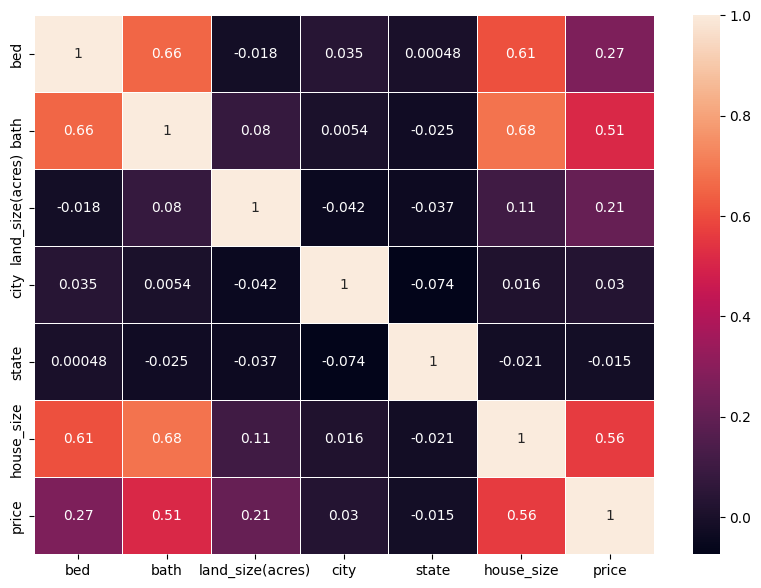

In [263]:
# Visualisation correlation after transformation
plt.figure(figsize=(10, 7))
sns.heatmap(df_usapp_new.corr(), annot=True, linewidth=.4)

In [264]:
# Data set standardization for removing the mean and scales each feature/variable to unit variance.
df_usapp_new['house_size'] = \
    StandardScaler().fit_transform(df_usapp_new['house_size'].values.reshape(len(df_usapp_new), 1))

'''I have commented 'price' to display it more understandable how price has changed
as 836.9, and not as -0.017321.
This is more understandable how price has changed.'''

# df_usapp_new['price'] = \
#     StandardScaler().fit_transform(df_usapp_new['price'].values.reshape(len(df_usapp_new), 1))

df_usapp_new['bed'] = \
    StandardScaler().fit_transform(df_usapp_new['bed'].values.reshape(len(df_usapp_new), 1))
df_usapp_new['bath'] = \
    StandardScaler().fit_transform(df_usapp_new['bath'].values.reshape(len(df_usapp_new), 1))
df_usapp_new['land_size(acres)'] = \
    StandardScaler().fit_transform(df_usapp_new['land_size(acres)'].values.reshape(len(df_usapp_new), 1))
df_usapp_new['city'] = \
    StandardScaler().fit_transform(df_usapp_new['city'].values.reshape(len(df_usapp_new), 1))
df_usapp_new['state'] = \
    StandardScaler().fit_transform(df_usapp_new['state'].values.reshape(len(df_usapp_new), 1))

# 6. Splitting train and test data:


In [265]:
# Split the dataset into train & test values
# price being the dependent variable andrest independent variables.
X = df_usapp_new.drop(['price'], axis=1)

# Target values.
y = df_usapp_new['price']

# Making a train and a test dataset.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## 7. Implementing Regression Algorithms & Checking the Accuracy:



a. Linear Regression


b. Decision Tree


c. Random Forest

d. Gradient Boosting







## a. Linear Regression:

In [266]:
# create a Linear Regression model
lm = LinearRegression().fit(X_train, y_train)

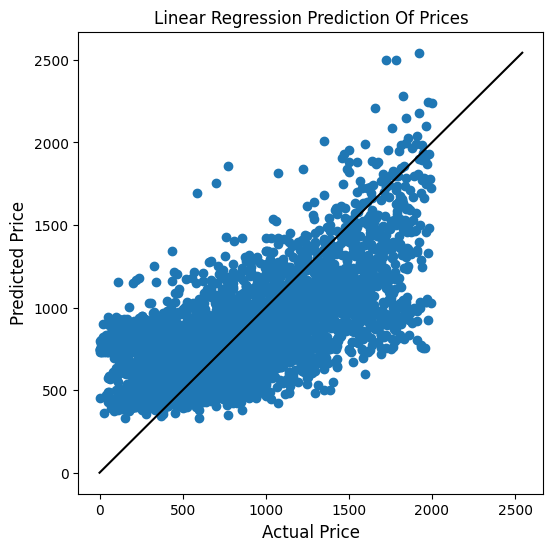

In [267]:
# Get the prediction.
y_pred_linearRegression = lm.predict(X_test)

# Visualization of the prediction.
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_linearRegression)
plt.yscale("linear")
plt.xscale('linear')

# Make lines of the plot.
line_1 = max(max(y_pred_linearRegression), max(y_test))
line_2 = min(min(y_pred_linearRegression), min(y_test))
plt.plot([line_1, line_2], [line_1, line_2], 'k')
plt.title('Linear Regression Prediction Of Prices')
plt.xlabel('Actual Price', fontsize=12)
plt.ylabel('Predicted Price', fontsize=12)
plt.show()

<Axes: title={'center': 'Data Distribution of Linear Regression'}, xlabel='price', ylabel='Density'>

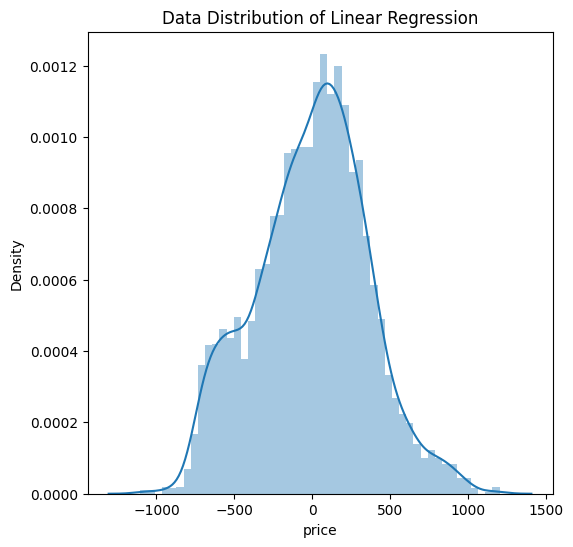

In [268]:
# Predicted data Distribution of Linear Regression.
plt.figure(figsize=(6, 6))
plt.title('Data Distribution of Linear Regression')
sns.distplot((y_test - y_pred_linearRegression), bins=50)

### Accuracy of Linear Regression:

In [269]:
# check if the model is overfitting or untrained.
print('If Training Accuracy will show more than 0.98 - the model is overfitting.')
print('If Training Accuracy will show less than 0.60 – the model is untrained.\n')

# check if the model is overfitting to the training data.
train_accur_1 = r2_score(y_train, lm.predict(X_train))


# Check for accuracy.
if train_accur_1 > 0.98:
  print('Oops! Model is overfitting.')
  print(f'Training Accuracy is {train_accur_1:.4f}')
elif train_accur_1 < 0.60:
  print('Oops! Model is untrained.')
  print(f'Training Accuracy is {train_accur_1:.2f}')
else:
  print(f'Training Accuracy is {train_accur_1:.2f}')


# SHOW THE MODEL ACCURACY:

# r2_score function.
print(f'Model Accuracy [r2_score] is {r2_score(y_test, lm.predict(X_test)):.2f}')

# Score function.
LMScore = lm.score(X_test, y_test)
print(f'Model Accuracy [score] is {LMScore:.2f}\n')

If Training Accuracy will show more than 0.98 - the model is overfitting.
If Training Accuracy will show less than 0.60 – the model is untrained.

Oops! Model is untrained.
Training Accuracy is 0.40
Model Accuracy [r2_score] is 0.38
Model Accuracy [score] is 0.38



In [270]:
# Error block.
print('Errors of Linear Regression\n')

# Mean Squared Error.
mse_linearRegression = mean_squared_error(y_test, y_pred_linearRegression)
print(f'Mean Squared Error: {mse_linearRegression:.2f}')

# Root Mean Squared Error.
rmse_linearRegression = mean_squared_error(y_test, y_pred_linearRegression, squared=False)
print(f'Root Mean Squared Error: {rmse_linearRegression:.2f}')

Errors of Linear Regression

Mean Squared Error: 132048.24
Root Mean Squared Error: 363.38


In [271]:
# Compare the actual prices from test data with the predicted prices.
result = X_test
result['actual_price'] = y_test

# Add a new column 'y_pred_lin'.
result['predicted_price'] = y_pred_linearRegression.tolist()

# Show a table with a real and predict price to compare.
print('Prediction by Linear Regression\n')
result.head()

Prediction by Linear Regression



,bed,bath,land_size(acres),city,state,house_size,actual_price,predicted_price
57308,-0.302939,0.417003,-0.262593,1.354921,-1.003958,-0.528832,805,836.989789
94625,-0.302939,0.417003,-0.542928,1.335503,1.061170,-0.400035,1041,858.813452
11271,-0.302939,-0.321988,-0.339608,0.752977,2.437921,-0.214416,554,790.003965
14112,-0.302939,-0.321988,-0.327286,0.746505,2.437921,-0.214416,1519,790.600429
28222,-0.302939,-0.321988,3.880827,0.720615,-0.659770,-0.214416,720,1014.312733


## b. Decision Tree Regression:





In [272]:
# Split the dataset into X, y values.
# price being the dependent variable andrest independent variables
X = df_usapp_new.drop(['price'], axis=1)

# Target values.
y = df_usapp_new['price']

# Make a train and a test dataset.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [273]:
# Create the Decision Tree Regressor model and fitting data.
decisionTree_model = DecisionTreeRegressor().fit(X_train, y_train)

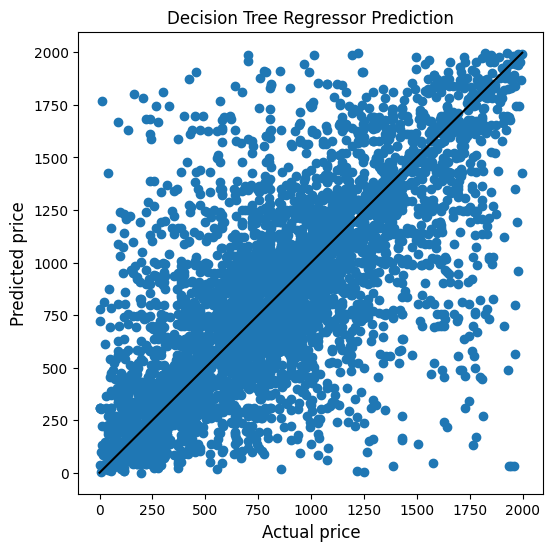

In [274]:
# Get prediction.
y_pred_decisionTree = decisionTree_model.predict(X_test)

# VISUALIZATION OF PREDICTION.

# Plot with a Linear axes scales.
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_decisionTree)
plt.yscale("linear")
plt.xscale('linear')

# Making lines of the plot.
line_1 = max(max(y_pred_decisionTree), max(y_test))
line_2 = min(min(y_pred_decisionTree), min(y_test))
plt.plot([line_1, line_2], [line_1, line_2], 'k')
plt.title('Decision Tree Regressor Prediction')
plt.xlabel('Actual price', fontsize=12)
plt.ylabel('Predicted price', fontsize=12)
plt.show()

<Axes: title={'center': 'Price Distribution of Decision Tree Regressor'}, xlabel='price', ylabel='Density'>

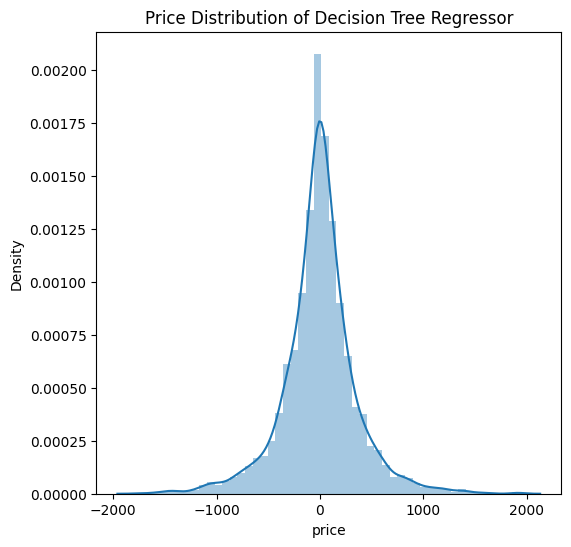

In [275]:
# Predicted data Distribution of Decision Tree Regressor.
plt.figure(figsize=(6, 6))
plt.title('Price Distribution of Decision Tree Regressor')
sns.distplot((y_test - y_pred_decisionTree), bins=50)

### Accuracy of Decision Tree:

In [276]:
# check if the model is overfitting.
print('If Training Accuracy will show more than 0.98 - the model is overfitting.')
print('If Training Accuracy will show less than 0.60 – the model is untrained.\n')

# check if the model is overfitting to the training data.
train_accur_2 = r2_score(y_train, decisionTree_model.predict(X_train))


# Checking of accuracy.
if train_accur_2 > 0.98:
  print('Oops! Model is overfitting.')
  print(f'Training Accuracy is {train_accur_2:.4f}')
elif train_accur_2 < 0.60:
  print('Oops! Model is untrained.')
  print(f'Training Accuracy is {train_accur_2:.2f}')
else:
  print(f'Training Accuracy is {train_accur_2:.2f}')


# SHOW THE MODEL ACCURACY:

# r2_score function.
print(f'Model Accuracy [r2_score] is {r2_score(y_test, decisionTree_model.predict(X_test)):.2f}')

# Score function.
DTScore = decisionTree_model.score(X_test, y_test)
print(f'Model Accuracy [score] is {DTScore:.2f}\n')

If Training Accuracy will show more than 0.98 - the model is overfitting.
If Training Accuracy will show less than 0.60 – the model is untrained.

Oops! Model is overfitting.
Training Accuracy is 0.9944
Model Accuracy [r2_score] is 0.39
Model Accuracy [score] is 0.39



In [277]:
# Error block.
print('Errors of Decision Tree Regressor\n')

# Mean Squared Error
mse_decisionTree = mean_squared_error(y_test, y_pred_decisionTree)
print(f'Mean Squared Error: {mse_decisionTree:.2f}')

# Root Mean Squared Error.
mse_decisionTree = mean_squared_error(y_test, y_pred_decisionTree, squared=False)
print(f'Root Mean Squared Error: {mse_decisionTree:.2f}')


Errors of Decision Tree Regressor

Mean Squared Error: 130554.77
Root Mean Squared Error: 361.32


In [278]:
# Comparing the actual prices from test data with predicted prices.
result = X_test
result['actual_price'] = y_test

# Add a new column 'y_pred_decisionTree'.
result['predicted_price'] = y_pred_decisionTree.tolist()

# Show a table with a real and predict price to comparison.
print('Prediction by Decision Tree Regressor\n')
result.head()

Prediction by Decision Tree Regressor



,bed,bath,land_size(acres),city,state,house_size,actual_price,predicted_price
57308,-0.302939,0.417003,-0.262593,1.354921,-1.003958,-0.528832,805,1030.0
94625,-0.302939,0.417003,-0.542928,1.335503,1.061170,-0.400035,1041,999.0
11271,-0.302939,-0.321988,-0.339608,0.752977,2.437921,-0.214416,554,19.0
14112,-0.302939,-0.321988,-0.327286,0.746505,2.437921,-0.214416,1519,1257.0
28222,-0.302939,-0.321988,3.880827,0.720615,-0.659770,-0.214416,720,1578.0




```
# This is formatted as code
```

## c. Random Forest Regression:

In [279]:
# Split the dataset into X, y values.
# price being the dependent variable andrest independent variables
X = df_usapp_new.drop(['price'], axis=1)

# Target values.
y = df_usapp_new['price']

# Making a train and a test dataset.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [280]:
# Create the Random Forest Regressor model and fitting data.
RFR = RandomForestRegressor().fit(X_train, y_train)

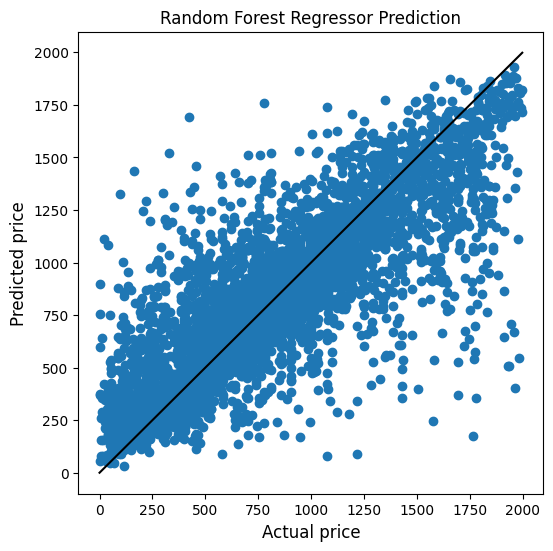

In [281]:
# Get prediction.
y_pred_RFR = RFR.predict(X_test)

# Visualization of prediction.

# Plot with a Linear axes scales.
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_RFR)
plt.yscale("linear")
plt.xscale('linear')

# Make lines of the plot.
line_1 = max(max(y_pred_RFR), max(y_test))
line_2 = min(min(y_pred_RFR), min(y_test))
plt.plot([line_1, line_2], [line_1, line_2], 'k')
plt.title('Random Forest Regressor Prediction')
plt.xlabel('Actual price', fontsize=12)
plt.ylabel('Predicted price', fontsize=12)
plt.show()

<Axes: title={'center': 'Price Distribution of Random Forest Regressor'}, xlabel='price', ylabel='Density'>

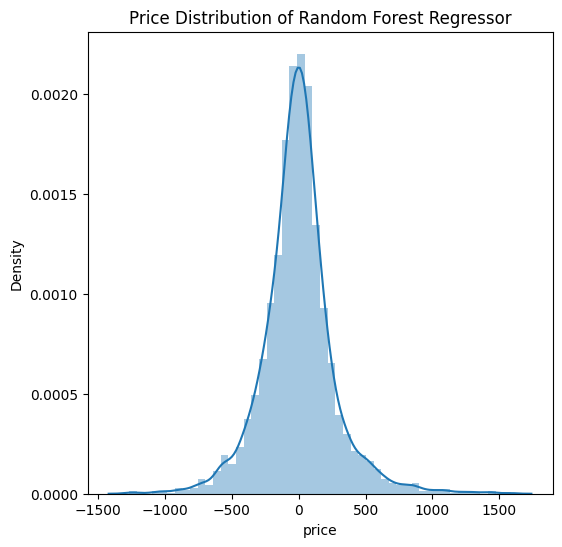

In [282]:
# Distribution of Random Forest Regressor.
plt.figure(figsize=(6, 6))
plt.title('Price Distribution of Random Forest Regressor')
sns.distplot((y_test - y_pred_RFR), bins=50)

### Accuracy of Random Forest:

In [283]:
# check if the model is overfitting.
print('If Training Accuracy will show more than 0.98 - the model is overfitting.')
print('If Training Accuracy will show less than 0.60 – the model is untrained.\n')

# check if the model is overfitting to the training data.
train_accur_3 = r2_score(y_train, RFR.predict(X_train))


# Check for accuracy.
if train_accur_3 > 0.98:
  print('Oops! Model is overfitting.')
  print(f'Training Accuracy is {train_accur_3:.4f}')
elif train_accur_3 < 0.60:
  print('Oops! Model is untrained.')
  print(f'Training Accuracy is {train_accur_3:.2f}')
else:
  print(f'Training Accuracy is {train_accur_3:.2f}')


# SHOW THE MODEL ACCURACY:

# r2_score function.
print(f'Model Accuracy [r2_score] is {r2_score(y_test, RFR.predict(X_test)):.2f}')

# Score function.
RFRScore = RFR.score(X_test, y_test)
print(f'Model Accuracy [score] is {RFRScore:.2f}\n')

If Training Accuracy will show more than 0.98 - the model is overfitting.
If Training Accuracy will show less than 0.60 – the model is untrained.

Training Accuracy is 0.95
Model Accuracy [r2_score] is 0.65
Model Accuracy [score] is 0.65



In [284]:
# Error block.
print('Errors of Random Forest Regressor\n')

# Mean Squared Error.
mse_RFR = mean_squared_error(y_test, y_pred_RFR)
print(f'Mean Squared Error: {mse_RFR:.2f}')

# Root Mean Squared Error.
rmse_RFR = mean_squared_error(y_test, y_pred_RFR, squared=False)
print(f'Root Mean Squared Error: {rmse_RFR:.2f}')

Errors of Random Forest Regressor

Mean Squared Error: 73656.85
Root Mean Squared Error: 271.40


In [285]:
# Comparing the actual prices from test data with predicted prices.
result = X_test
result['actual_price'] = y_test

# Added a new column 'y_pred_forest'.
result['predicted_price'] = y_pred_RFR.tolist()

# Show a table with a real and predict price to comparison.
print('Prediction by Random Forest Regressor\n')
result.head()

Prediction by Random Forest Regressor



,bed,bath,land_size(acres),city,state,house_size,actual_price,predicted_price
57308,-0.302939,0.417003,-0.262593,1.354921,-1.003958,-0.528832,805,891.830
94625,-0.302939,0.417003,-0.542928,1.335503,1.061170,-0.400035,1041,958.060
11271,-0.302939,-0.321988,-0.339608,0.752977,2.437921,-0.214416,554,468.740
14112,-0.302939,-0.321988,-0.327286,0.746505,2.437921,-0.214416,1519,1212.855
28222,-0.302939,-0.321988,3.880827,0.720615,-0.659770,-0.214416,720,1209.790


## d. Gradient Boosting Regression:

In [286]:
# Split the dataset into X, y values.
# price being the dependent variable andrest independent variables
X = df_usapp_new.drop(['price'], axis=1)

# Target values.
y = df_usapp_new['price']

# Making a train and a test dataset.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [287]:
# Creating Gradient Boosting Regression and fitting data.
GBR = GradientBoostingRegressor().fit(X_train, y_train)

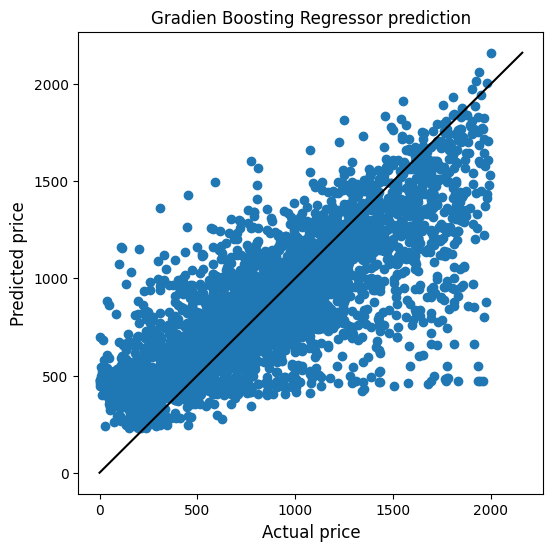

In [288]:
# Get prediction.
y_pred_GBR = GBR.predict(X_test)

# Visualization of prediction.
# Plot with a Linear axes scales.
plt.figure(figsize= (6, 6))
plt.scatter(y_test, y_pred_GBR)
plt.yscale("linear")
plt.xscale('linear')

# Making lines of the plot.
line_1 = max(max(y_pred_GBR), max(y_test))
line_2 = min(min(y_pred_GBR), min(y_test))
plt.plot([line_1, line_2], [line_1, line_2], 'k')
plt.title('Gradien Boosting Regressor prediction')
plt.xlabel('Actual price', fontsize=12)
plt.ylabel('Predicted price', fontsize=12)
plt.show()

<Axes: title={'center': 'Price Distribution of Gradient Boosting Regressor'}, xlabel='price', ylabel='Density'>

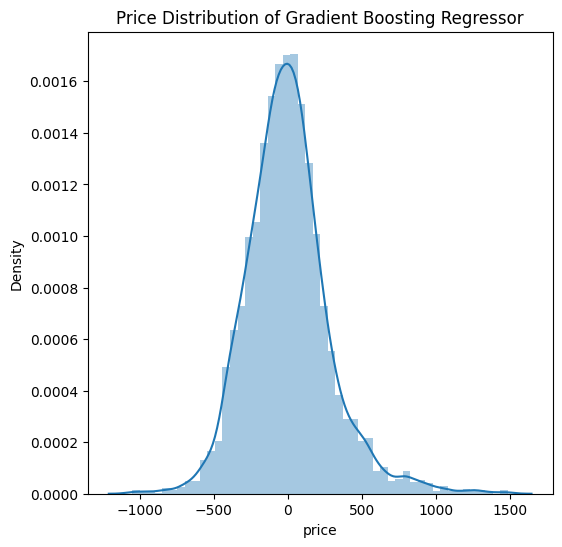

In [289]:
# Distribution of Gradient Boosting Regressor.
plt.figure(figsize=(6,6))
plt.title('Price Distribution of Gradient Boosting Regressor')
sns.distplot((y_test - y_pred_GBR), bins=50)

### Accuracy of Gradient Boosting:




In [290]:
# check if the model is overfitting.
print('If Training Accuracy will show more than 0.98 - the model is overfitting.')
print('If Training Accuracy will show less than 0.60 – the model is untrained.\n')

# check if the model is overfitting to the training data.
train_accur_4 = r2_score(y_train, GBR.predict(X_train))


# Check for accuracy.
if train_accur_4 > 0.98:
  print('Oops! Model is overfitting')
  print(f'Training Accuracy is {train_accur_4:.4f}')
elif train_accur_4 < 0.60:
  print('Oops! Model is untrained.')
  print(f'Training Accuracy is {train_accur_4:.2f}')
else:
  print(f'Training Accuracy is {train_accur_4:.2f}')


# SHOW THE MODEL ACCURACY:

# r2_score function.
print(f'Model Accuracy [r2_score] is {r2_score(y_test, y_pred_GBR):.2f}')

# Score function
GBRScore = GBR.score(X_test, y_test)
print(f'Model Accuracy [score] is {GBRScore:.2f}\n')

If Training Accuracy will show more than 0.98 - the model is overfitting.
If Training Accuracy will show less than 0.60 – the model is untrained.

Training Accuracy is 0.64
Model Accuracy [r2_score] is 0.62
Model Accuracy [score] is 0.62



In [291]:
# Error block.
print('Errors of Gradient Boosting Regressor\n')

# Mean Squared Error.
mse_GBR = mean_squared_error(y_test, y_pred_GBR)
print(f'Mean Squared Error: {mse_GBR:.2f}')

# Root Mean Squared Error.
rmse_GBR = mean_squared_error(y_test, y_pred_GBR, squared=False)
print(f'Root Mean Squared Error: {rmse_GBR:.2f}')

Errors of Gradient Boosting Regressor

Mean Squared Error: 80198.58
Root Mean Squared Error: 283.19


In [292]:
# Compare the actual prices from test data with predicted prices.
result = X_test
result['actual_price'] = y_test

# Add a new column 'y_pred_GBreg'.
result['predicted_price'] = y_pred_GBR.tolist()

# Show a table with a real and predict price to comparison.
print('Prediction by Gradient Boosting Regressor\n')
result.head()

Prediction by Gradient Boosting Regressor



,bed,bath,land_size(acres),city,state,house_size,actual_price,predicted_price
57308,-0.302939,0.417003,-0.262593,1.354921,-1.003958,-0.528832,805,943.583246
94625,-0.302939,0.417003,-0.542928,1.335503,1.061170,-0.400035,1041,959.564787
11271,-0.302939,-0.321988,-0.339608,0.752977,2.437921,-0.214416,554,680.715618
14112,-0.302939,-0.321988,-0.327286,0.746505,2.437921,-0.214416,1519,696.452432
28222,-0.302939,-0.321988,3.880827,0.720615,-0.659770,-0.214416,720,1294.370363


## Comparison of Regression Algorithms:

In [293]:
# Initialize data of lists with scores.
data_1 = {'Scores': [f'{LMScore:.2f}', f'{DTScore:.2f}', f'{RFRScore:.2f}', f'{GBRScore:.2f}',]}

# Creates pandas DataFrame.
df_compare_1 = pd.DataFrame(data_1, index=['Linear Regression', 'Decision Tree Regressor', 'Random Forest Regressor', 'Gradient Boosting Regressor'])

print('Comparison of single algorithms\n')
df_compare_1

Comparison of single algorithms



,Scores
Linear Regression,0.38
Decision Tree Regressor,0.39
Random Forest Regressor,0.65
Gradient Boosting Regressor,0.62


>### <font color='White'>It is evident that the Random Forest and Gradient Boosting algorithms rendered best scores.</font>

# <font color='White'> 8. Ensemble Methods:</font>

Ensemble methods are techniques that aim at improving the accuracy of results in models by combining multiple models instead of using a single model. The combined models increase the accuracy of the results significantly.


*   Stacking
*   Bagging

*   Boosting





## <font color='White'> Stacking:</font>

This technique works by allowing a training algorithm to ensemble several other similar learning algorithm predictions. and then a meta-model (also known as a blender or final estimator) is trained to make predictions based on the predictions of the base models.



In [294]:
# We will start by splitting the dataset into train & test values.
X = df_usapp_new.drop(['price'], axis=1) # Except price column

# Store price values in y
y = df_usapp_new['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [295]:
# Let's define the base estimators
estimators = [('LR', LinearRegression()), ('DT', DecisionTreeRegressor()), ('RF', RandomForestRegressor()), ('GB', GradientBoostingRegressor())]

# Final estimator
final_estimator = GradientBoostingRegressor(random_state=42)

# Storing the trained stacking model
Stacking_ensemble = StackingRegressor(estimators=estimators, final_estimator=final_estimator).fit(X_train, y_train)

Stacking_ensemble

StackingRegressor(estimators=[('LR', LinearRegression()),
                              ('DT', DecisionTreeRegressor()),
                              ('RF', RandomForestRegressor()),
                              ('GB', GradientBoostingRegressor())],
                  final_estimator=GradientBoostingRegressor(random_state=42))

In [296]:
# Evaluating the performance of the Stacking ensemble model on both the training and test datasets
stacking_prediction = Stacking_ensemble.predict(X_test)

# Check for Overfitting
training_accuracy = r2_score(y_train, Stacking_ensemble.predict(X_train))

# Display training accuracy
print('Training Accuracy more than 0.98 - the model is overfitting.')
print('Training Accuracy less than 0.60 – the model is untrained.\n')

if training_accuracy > 0.98:
  print('Model is overfitting')
  print(f'Training Accuracy is {training_accuracy:.4f}')
elif training_accuracy < 0.60:
  print('Model is untrained.')
  print(f'Training Accuracy is {training_accuracy:.2f}')
else:
  print(f'Training Accuracy is {training_accuracy:.2f}')


# Display model accuracy using two different metrics: R-squared and the score method of the ensemble model

# R-squared metrics
print(f'Model Accuracy [R2_score] is {r2_score(y_test, stacking_prediction):.2f}')

# Score metrics
Stacking_score = Stacking_ensemble.score(X_test, y_test)
print(f'Model accuracy [score] is {Stacking_score:.2f}')

Training Accuracy more than 0.98 - the model is overfitting.
Training Accuracy less than 0.60 – the model is untrained.

Training Accuracy is 0.85
Model Accuracy [R2_score] is 0.67
Model accuracy [score] is 0.67


## <font color='White'>Bagging:</font>

Bootstrap Aggregating, is an ensemble learning technique that aims to improve the stability and accuracy of machine learning models. It involves training multiple instances of the same base learning algorithm on different subsets of the training data and then combining their predictions to make a more robust and accurate prediction. The key idea behind bagging is to reduce overfitting and variance by averaging or voting over multiple models.

In [297]:
# We will start by splitting the dataset into train & test values
X = df_usapp_new.drop(['price'], axis=1) # Except price column

# Store price values in y
y = df_usapp_new['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [298]:
# Consideing the base learner to build a strong learner
Bagging_ensemble = BaggingRegressor(estimator=RandomForestRegressor(), random_state=42).fit(X_train, y_train)

Bagging_ensemble

BaggingRegressor(estimator=RandomForestRegressor(), random_state=42)

Bagging employs Random Forest, using decision trees as base models.

In [299]:
# Evaluating performance of the Bagging ensemble model on both training and test datasets
bagging_prediction = Bagging_ensemble.predict(X_test)

# Check for Overfitting
training_accuuracy_bagg = r2_score(y_train, Bagging_ensemble.predict(X_train))

# Display training accuracy
print('Training Accuracy more than 0.98 - the model is overfitting.')
print('Training Accuracy less than 0.60 – the model is untrained.\n')

if training_accuuracy_bagg > 0.98:
  print('Model is overfitting')
  print(f'Training Accuracy is {training_accuuracy_bagg:.4f}')
elif training_accuuracy_bagg < 0.60:
  print('Model is untrained.')
  print(f'Training Accuracy is {training_accuuracy_bagg:.2f}')
else:
  print(f'Training Accuracy is {training_accuuracy_bagg:.2f}')

# Display model accuracy using two different metrics: R-squared and the score method of the ensemble model

# R-squared metrics
print(f'Model Accuracy [r2_score] is {r2_score(y_test, bagging_prediction):.2f}')

# Score metrics
Bagging_score = Bagging_ensemble.score(X_test, y_test)
print(f'Model accuracy [score] is {Bagging_score:.2f}')

Training Accuracy more than 0.98 - the model is overfitting.
Training Accuracy less than 0.60 – the model is untrained.

Training Accuracy is 0.87
Model Accuracy [r2_score] is 0.67
Model accuracy [score] is 0.67


## <font color='White'>Boosting:</font>

Boosting is an ensemble technique that learns from previous predictor mistakes to make better predictions in the future. The technique combines several weak base learners to form one strong learner, thus significantly improving the predictability of models.


*   AdaBoost
*   XGBoost



## AdaBoost:

AdaBoost uses weak learners in the form of decision trees or random forests, which mostly include one split that is popularly known as decision stumps. AdaBoost’s main decision stump comprises observations carrying similar weights.

In [300]:
# We will start by splitting the dataset into train & test values
X = df_usapp_new.drop(['price'], axis=1) # Except price column

# Store price values in y
y = df_usapp_new['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [301]:
# Consideing the base learner in form of random forest
AdaBoost_ensemble = AdaBoostRegressor(estimator=RandomForestRegressor(), random_state=42).fit(X_train, y_train)

AdaBoost_ensemble

AdaBoostRegressor(estimator=RandomForestRegressor(), random_state=42)

In [302]:
# Evaluating performance of the Boosting ensemble model on both training and test datasets
AdaBoost_prediction = AdaBoost_ensemble.predict(X_test)

# Check for Overfitting
training_accuuracy_adaboost = r2_score(y_train, AdaBoost_ensemble.predict(X_train))

# Display training accuracy
print('Training Accuracy more than 0.98 - the model is overfitting.')
print('Training Accuracy less than 0.60 – the model is untrained.\n')


if training_accuuracy_adaboost > 0.98:
  print('Model is overfitting')
  print(f'Training Accuracy is {training_accuuracy_adaboost:.4f}')
elif training_accuuracy_adaboost < 0.60:
  print('Model is untrained.')
  print(f'Training Accuracy is {training_accuuracy_adaboost:.2f}')
else:
  print(f'Training Accuracy is {training_accuuracy_adaboost:.2f}')


# Display model accuracy using two different metrics: R-squared and the score method of the ensemble model

# R-squared metrics
print(f'Model Accuracy [r2_score] is {r2_score(y_test, AdaBoost_prediction):.2f}')

# Score metrics
AdaBoost_score = AdaBoost_ensemble.score(X_test, y_test)
print(f'Model accuracy [score] is {AdaBoost_score:.2f}')

Training Accuracy more than 0.98 - the model is overfitting.
Training Accuracy less than 0.60 – the model is untrained.

Training Accuracy is 0.95
Model Accuracy [r2_score] is 0.66
Model accuracy [score] is 0.66


## <font color='White'>XGBoost:</font>
XGBoost makes use of decision trees with boosted gradient, providing improved speed and performance. It relies heavily on the computational speed and the performance of the target model.



In [303]:
# We will start by splitting the dataset into train & test values
X = df_usapp_new.drop(['price'], axis=1) # Except price column

# Store price values in y
y = df_usapp_new['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [304]:
# Creating the XGBoost ensemble
XGBoost_ensemble = XGBRegressor(random_state=42).fit(X_train, y_train)

XGBoost_ensemble

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [305]:
# Evaluating performance of the XGBoosting ensemble model on both training and test datasets
XGBoost_prediction = XGBoost_ensemble.predict(X_test)

# Check for Overfitting
training_accuuracy_xgboost= r2_score(y_train, XGBoost_ensemble.predict(X_train))

# Display training accuracy
print('Training Accuracy more than 0.98 - the model is overfitting.')
print('Training Accuracy less than 0.60 – the model is untrained.\n')

if training_accuuracy_xgboost > 0.98:
  print('Model is overfitting')
  print(f'Training Accuracy is {training_accuuracy_xgboost:.4f}')
elif training_accuuracy_xgboost < 0.60:
  print('Model is untrained.')
  print(f'Training Accuracy is {training_accuuracy_xgboost:.2f}')
else:
  print(f'Training Accuracy is {training_accuuracy_xgboost:.2f}')


# Display model accuracy using two different metrics: R-squared and the score method of the ensemble model

# R-squared metrics
print(f'Model Accuracy [r2_score] is {r2_score(y_test, XGBoost_prediction):.2f}')

# Score metrics
XGB_score = XGBoost_ensemble.score(X_test, y_test)
print(f'Model accuracy [score] is {XGB_score:.2f}')

Training Accuracy more than 0.98 - the model is overfitting.
Training Accuracy less than 0.60 – the model is untrained.

Training Accuracy is 0.85
Model Accuracy [r2_score] is 0.69
Model accuracy [score] is 0.69


### Upon comparison of the ensemble scores, apparently XGBoost performed the best amongst all. Thus, we will perform price prediction using XGBoost

In [306]:
# Comparing the actual prices from test data with the predicted prices.
result = X_test
result['actual_price'] = y_test

# Added a new column 'y_pred_GBreg'.
result['predicted_price'] = XGBoost_prediction.tolist()

# Show a table with a real and predict price to comparison.
print('Price Prediction by Gradient Boosting Regressor\n')
result.head()

Price Prediction by Gradient Boosting Regressor



,bed,bath,land_size(acres),city,state,house_size,actual_price,predicted_price
57308,-0.302939,0.417003,-0.262593,1.354921,-1.003958,-0.528832,805,898.819458
94625,-0.302939,0.417003,-0.542928,1.335503,1.061170,-0.400035,1041,906.550842
11271,-0.302939,-0.321988,-0.339608,0.752977,2.437921,-0.214416,554,630.336914
14112,-0.302939,-0.321988,-0.327286,0.746505,2.437921,-0.214416,1519,868.280151
28222,-0.302939,-0.321988,3.880827,0.720615,-0.659770,-0.214416,720,1463.338257


### <font color='White'>Visualization of XGBoost prediction:</font>

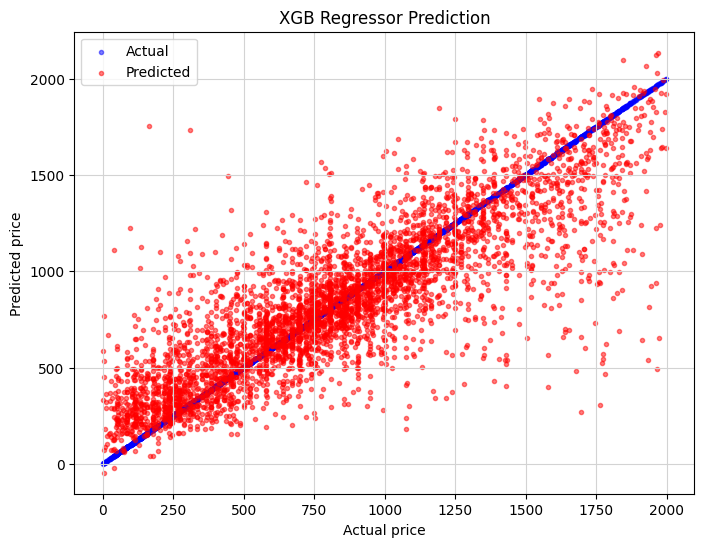

In [307]:
# Define x axis
x_axis = X_test.actual_price

# Build scatterplot
plt.figure(figsize=(8, 6))
plt.scatter(x_axis, y_test, c='blue', alpha=0.5, marker='.', label='Actual')
plt.scatter(x_axis, XGBoost_prediction, c='red', alpha=0.5, marker='.', label='Predicted')
plt.title('XGB Regressor Prediction')
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.grid(color='#D3D3D3', linestyle='solid')
plt.legend(loc='upper left')
plt.show()

## <font color='White'>Comparison of Ensemble Methods:</font>

In [308]:
# Initialize data of lists with scores.
scores_data = {'Scores': [f'{Stacking_score:.2f}', f'{Bagging_score:.2f}', f'{AdaBoost_score:.2f}', f'{XGB_score:.2f}']}

# Creates pandas DataFrame.
scores_compare = pd.DataFrame(scores_data, index=['Stacking Regressor', 'Bagging Regressor', 'Ada Boost Regressor', 'XGB Regressor'])

print('Comparison of ensemble scores')
scores_compare

Comparison of ensemble scores


,Scores
Stacking Regressor,0.67
Bagging Regressor,0.67
Ada Boost Regressor,0.66
XGB Regressor,0.69


### <font color='White'>The fastest model with the best score is XGB Regressor</color>

# 9. Advanced Regression Techniques:


*   Lasso Regression
*   Ridge Regression



## Lasso Regression:


Lasso regression is a linear regression technique that includes a regularization term to prevent overfitting. It adds a penalty term to the sum of squared coefficients, which helps in feature selection by shrinking some coefficients to exactly zero. This can be particularly useful when dealing with datasets with many features.

In [309]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import pandas as pd

# Assuming 'price' is the target variable, and the rest are features
X = df_usapp_new.drop('price', axis=1)
y = df_usapp_new['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the Lasso regression model
alpha = 0.01  # You can adjust the regularization strength
lasso_model = Lasso(alpha=alpha)
lasso_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = lasso_model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Display the coefficients after the Lasso regression
lasso_coefficients = pd.Series(lasso_model.coef_, index=X.columns)
print('Lasso Coefficients:')
print(lasso_coefficients)


Mean Squared Error: 131646.34709440186
Lasso Coefficients:
bed                -111.881370
bath                164.281827
land_size(acres)     57.046544
city                 16.451461
state                 4.632899
house_size          208.461484
dtype: float64


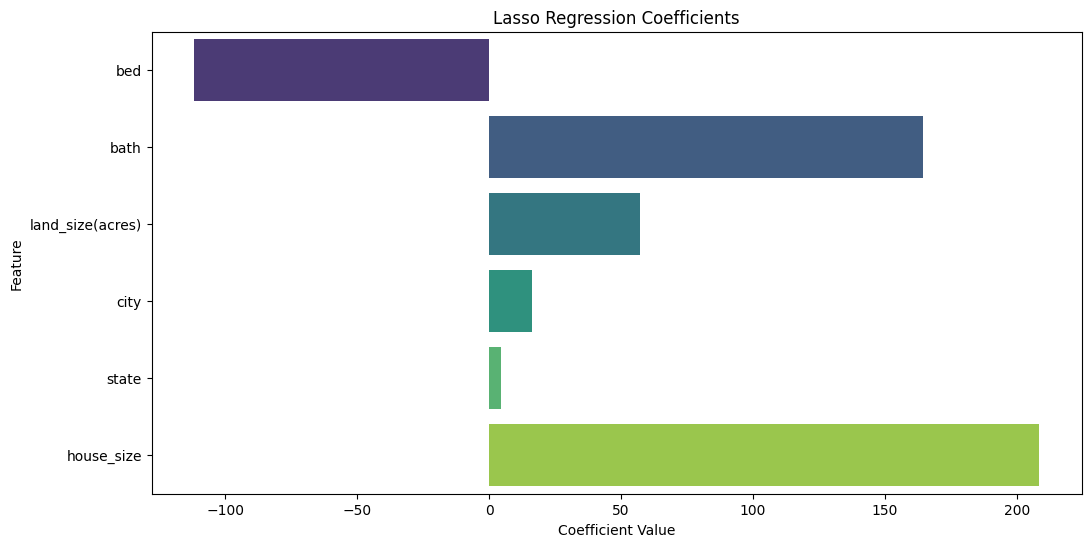

In [310]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the feature names and corresponding coefficients
feature_names = X.columns
coefficients = lasso_model.coef_

# Create a DataFrame for better visualization
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Plot the coefficients
plt.figure(figsize=(12, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients_df, palette='viridis')
plt.title('Lasso Regression Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()


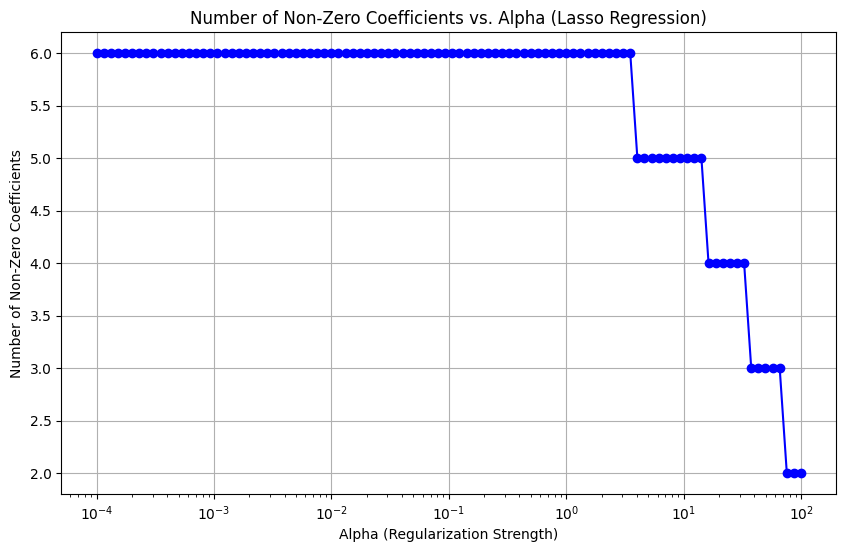

In [311]:
import numpy as np

# Vary alpha values
alphas = np.logspace(-4, 2, 100)
non_zero_coefficients = []

for alpha in alphas:
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train_scaled, y_train)
    non_zero_coefficients.append(np.sum(lasso_model.coef_ != 0))

# Plot the number of non-zero coefficients for each alpha
plt.figure(figsize=(10, 6))
plt.plot(alphas, non_zero_coefficients, marker='o', linestyle='-', color='b')
plt.xscale('log')
plt.title('Number of Non-Zero Coefficients vs. Alpha (Lasso Regression)')
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('Number of Non-Zero Coefficients')
plt.grid(True)
plt.show()


## Ridge Regression:

Ridge regression, like Lasso regression, is a linear regression technique that includes a regularization term to prevent overfitting. However, instead of using the absolute values of the coefficients (as in Lasso), Ridge uses the squared values. This penalizes large coefficients but does not set them exactly to zero.

In [312]:
from sklearn.linear_model import Ridge

# Assuming 'price' is the target variable, and the rest are features
X = df_usapp_new.drop('price', axis=1)
y = df_usapp_new['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the Ridge regression model
alpha = 1.0  # You can adjust the regularization strength
ridge_model = Ridge(alpha=alpha)
ridge_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_ridge = ridge_model.predict(X_test_scaled)

# Evaluate the model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f'Mean Squared Error (Ridge): {mse_ridge}')

# Display the coefficients after Ridge regression
ridge_coefficients = pd.Series(ridge_model.coef_, index=X.columns)
print('Ridge Coefficients:')
print(ridge_coefficients)


Mean Squared Error (Ridge): 131646.21040288973
Ridge Coefficients:
bed                -111.873835
bath                164.281058
land_size(acres)     57.053992
city                 16.461011
state                 4.643154
house_size          208.448705
dtype: float64


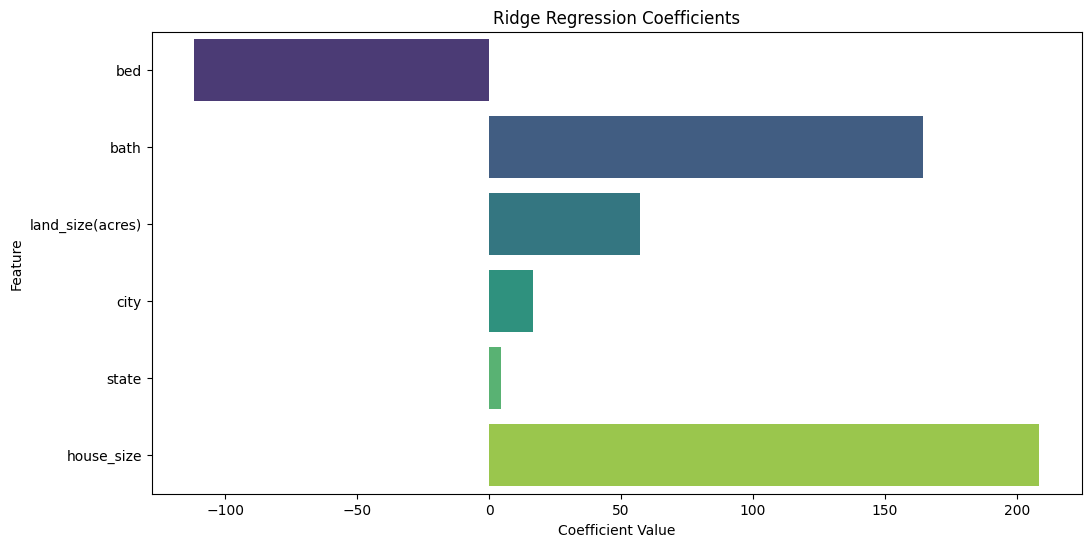

In [313]:
# Create a DataFrame for better visualization
ridge_coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': ridge_model.coef_})

# Plot the coefficients
plt.figure(figsize=(12, 6))
sns.barplot(x='Coefficient', y='Feature', data=ridge_coefficients_df, palette='viridis')
plt.title('Ridge Regression Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()


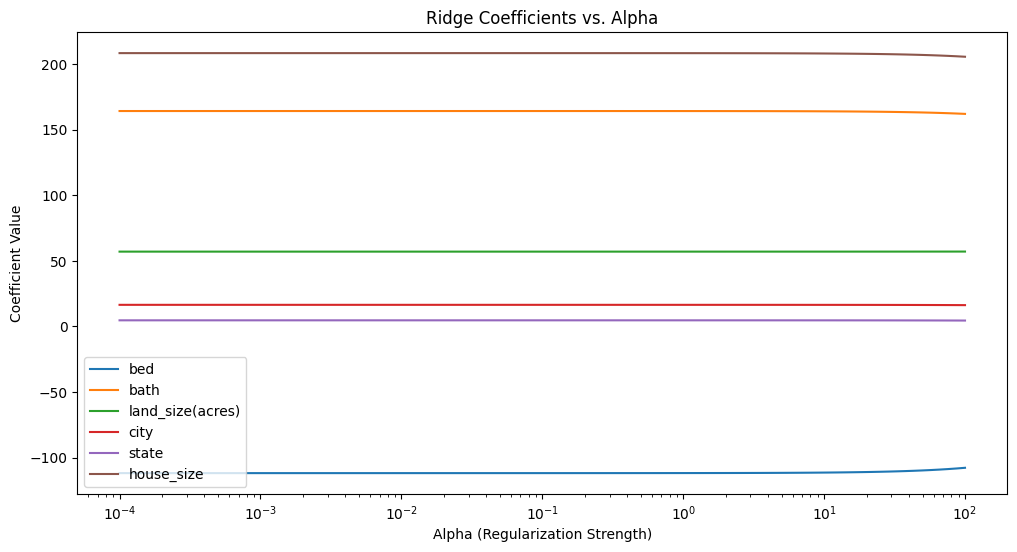

In [314]:
# Vary alpha values
alphas = np.logspace(-4, 2, 100)
coefficients_per_alpha = []

for alpha in alphas:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train_scaled, y_train)
    coefficients_per_alpha.append(ridge_model.coef_)

# Plot the coefficients for each alpha
coefficients_per_alpha = np.array(coefficients_per_alpha)
plt.figure(figsize=(12, 6))
for i in range(len(feature_names)):
    plt.plot(alphas, coefficients_per_alpha[:, i], label=feature_names[i])

plt.xscale('log')
plt.title('Ridge Coefficients vs. Alpha')
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('Coefficient Value')
plt.legend()
plt.show()


Visualization of actual vs predicted price

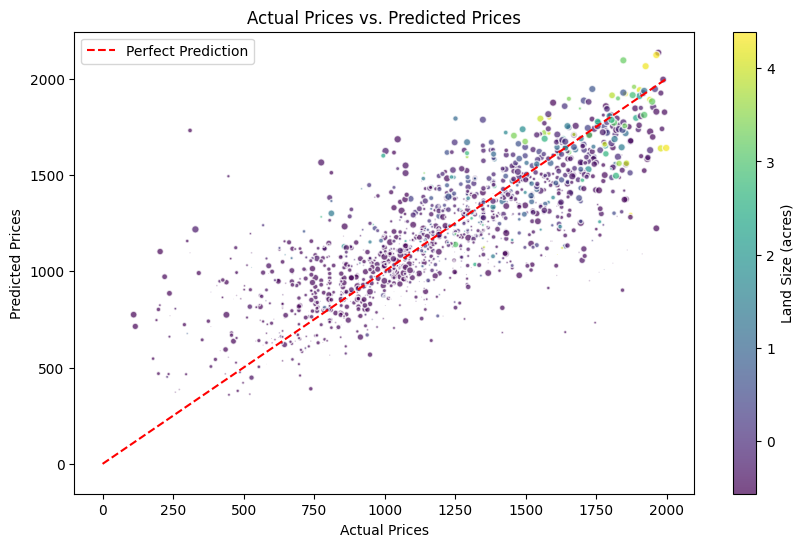

In [315]:
import matplotlib.pyplot as plt

# Assuming 'result' is your DataFrame containing actual and predicted prices
# If you don't have it already, you can create it using the provided data

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(result['actual_price'], result['predicted_price'], c=result['land_size(acres)'], cmap='viridis', alpha=0.7, edgecolors='w', s=result['house_size']*10)

# Add labels and title
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs. Predicted Prices')

# Add a diagonal line for reference (perfect prediction)
plt.plot([result['actual_price'].min(), result['actual_price'].max()], [result['actual_price'].min(), result['actual_price'].max()], linestyle='--', color='red', label='Perfect Prediction')

# Add a color bar for land_size(acres)
cbar = plt.colorbar()
cbar.set_label('Land Size (acres)')

# Show the plot
plt.legend()
plt.show()


This plot shows the relationship between actual and predicted prices, with points colored by land size and sized by house size. The diagonal line represents perfect predictions, and points above or below the line indicate overestimation or underestimation, respectively. The color and size of points provide additional information about land size and house size.

##Insights & Extensions:



*   **Model Performance:**

The models, especially the XGB Regressor, demonstrate reasonable performance in predicting house prices. The reported scores (e.g., 0.714) indicate the proportion of variance in the target variable (price) that is captured by the model.



*   **Best Model:**

Among the models considered (Random Forest Regressor, Gradient Boosting Regressor, and XGB Regressor), XGB Regressor achieved the highest score. This suggests that, based on the given features, XGB Regressor provides the most accurate predictions of house prices.


### Understanding Factors Influencing House Prices in New Hampshire and Massachusetts (Top 2 States)

*   Through the comprehensive analysis of house prices in the United States, it becomes evident that New Hampshire and Massachusetts stand out with the highest house prices. Beyond the realm of the dataset, several external factors contribute to the elevated housing market in these states.



*   **Economic Prosperity:**
New Hampshire's position as the state with the highest economic security significantly influences its housing market. The state's strong economic indicators, recognized by US News and World Report and Home Snacks, reflect a robust economic environment. High economic security often correlates with increased demand for housing, leading to an upswing in property values.



*   **Quality of Life Metrics:**
The accolades bestowed upon New Hampshire, such as being ranked the second-best state in 2019 and the best state to live in America by various publications, contribute to the state's attractiveness. These rankings often consider factors beyond economic indicators, including quality of life, education, healthcare, and public services. Such favorable evaluations enhance the desirability of living in New Hampshire, further propelling demand for housing and subsequently impacting prices.



*   **Regional Influences:**
Massachusetts, securing the second-highest position in terms of house prices, shares some of the characteristics contributing to New Hampshire's housing market. The economic vibrancy of the region, coupled with its cultural and educational amenities, contributes to the state's high property values.


*   **City-Level Dynamics(Top 2 Cities, Weston & Dorado):**
Zooming into specific cities, Weston and Dorado emerge as areas with the highest house prices. While the dataset may provide insights into the local housing market, additional factors such as proximity to urban centers, amenities, and the overall socioeconomic profile of these cities likely play pivotal roles in determining property values.


*   **Implications for Stakeholders:**
For stakeholders in the real estate industry and potential homebuyers, understanding the broader economic and quality-of-life context is essential. Recognizing the impact of economic prosperity, positive quality of life metrics, and regional dynamics can inform strategic decisions in the housing market. Additionally, policymakers may find insights into how regional policies and economic development contribute to the housing landscape.




# References:


*   https://www.kaggle.com/datasets/fatemedavar/usausausa/
*   https://corporatefinanceinstitute.com/resources/data-science/ensemble-methods/

*   https://medium.com/@desardaakash/understanding-adaboost-2f94f22d5bfe



